In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

In [2]:
df = pd.read_excel('laser_stability.xlsx')

C:\Users\karth\AppData\Local\Temp\ipykernel_27608\897560343.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


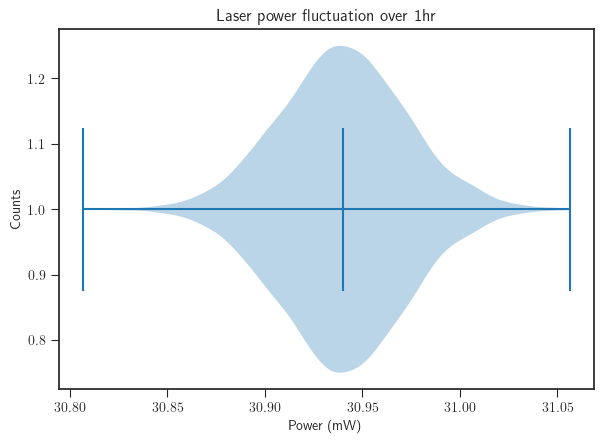

Mean Power is 30.94 mW +/- 0.03 mW


In [3]:
bins = np.linspace(30.8, 31.07, 65)
mean_power = np.mean(df['Power (mW)'])
std_dev = np.std(df['Power (mW)'])
plt.style.use('seaborn-ticks')
plt.rcParams['text.usetex'] = True
mpl.rc('mathtext', default='regular')
plt.figure()

plt.violinplot([df['Power (mW)']], vert=False, showmeans = True)
plt.xlabel('Power (mW)')
plt.ylabel('Counts')
plt.title('Laser power fluctuation over 1hr')
plt.legend(loc='upper left')
plt.tight_layout(pad=2)

plt.savefig('filename.svg')
plt.show()
print('Mean Power is', '{0:.2f}'.format(mean_power), 'mW +/-', '{0:.2f}'.format(std_dev), 'mW')

## Violin Plot

In [4]:
font_dict=dict(family='Arial',
               size=26,
               color='black'
               )
fig = px.violin(df, x = 'Power (mW)', box=True)
fig.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  width=850,  # figure width
                  height=700,  # figure height
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )
fig.update_yaxes(title_text='',  # axis label
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=2.4, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror='allticks',  # add ticks to top/right axes
                 tickwidth=2.4,  # tick width
                 tickcolor='black',  # tick color
                 )
fig.update_xaxes(title_text='Power (mW)',
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=2.4,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror='allticks',
                 tickwidth=2.4,
                 tickcolor='black',
                 )

fig.show()

In [6]:
px.scatter(df, df['Time'], df['Power (mW)'].expanding().mean(), trendline='rolling', trendline_options=dict(window=15), color='Power error (mW)')